In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats

In [ ]:
# sleeps = pd.read_csv("original_data/sleep.csv")
# sleeps = pd.read_csv("original_data/sleep_timestamp.csv")
sleeps = pd.read_csv("original_data/sleep_timestamp.csv")

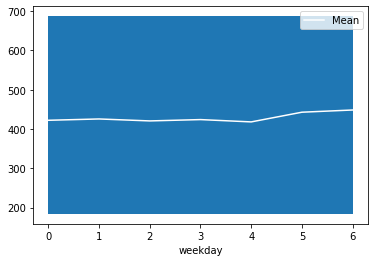

In [11]:
def get_weekday(date: str):
    return datetime.datetime.strptime(date,"%Y-%m-%d").weekday()

sleep = pd.read_csv('refined_data/sleep/sleep_daily_timestamp_term.csv')
# sleep[(np.abs(stats.zscore(sleep)) < 3).all(axis=1)]
q_low = sleep["minsasleep"].quantile(0.03)
q_hi  = sleep["minsasleep"].quantile(0.99)

sleep = sleep[(sleep["minsasleep"] < q_hi) & (sleep["minsasleep"] > q_low)]
sleep['weekday'] = sleep['dataDate'].apply(get_weekday)

data = sleep.groupby('weekday', as_index=False)['minsasleep'].agg({'Low Value':'min','High Value':'max','Mean':'mean'})
data.reset_index(inplace=True)

ax  = data.plot(x='weekday', y='Mean', c='white')
plt.fill_between(x='weekday', y1='Low Value', y2='High Value', data=data)

In [15]:
sleep_eff = sleeps.groupby(['egoid'])['Efficiency'].count()
# print(sleep_eff.head(5))
# print(type(sleep_eff))
# sleep_eff.sort_values(by='Efficiency', ascending=False)
sleep_eff

egoid
10237    1027
10469     255
10547      27
11002     854
11128     360
         ... 
98700    1256
98760     832
98766     541
99733    1133
99978     792
Name: Efficiency, Length: 622, dtype: int64

<AxesSubplot:xlabel='Efficiency'>

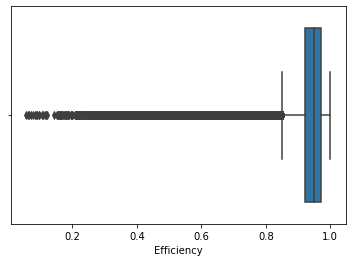

In [16]:
sns.boxplot(x=sleeps['Efficiency'])

<AxesSubplot:xlabel='minstofallasleep'>

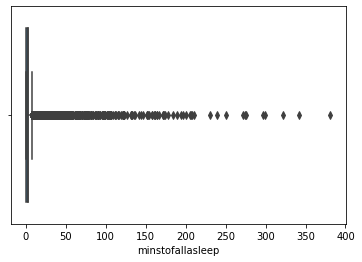

In [17]:
sns.boxplot(x=sleeps['minstofallasleep'])

<AxesSubplot:xlabel='minsasleep'>

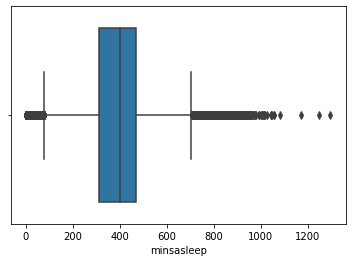

In [18]:
sns.boxplot(x=sleeps['minsasleep'])

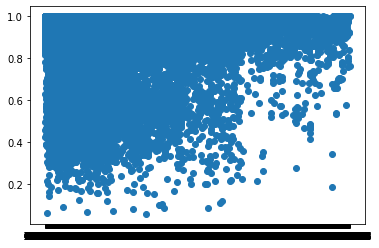

In [20]:
x = sleeps.timetobed
y = sleeps.Efficiency

plt.scatter(x, y)

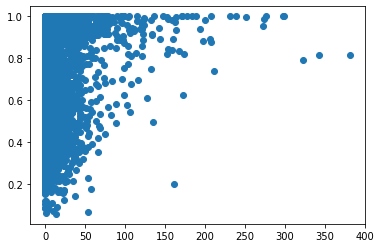

In [ ]:
x = sleeps.minstofallasleep
y = sleeps.Efficiency

plt.scatter(x, y)

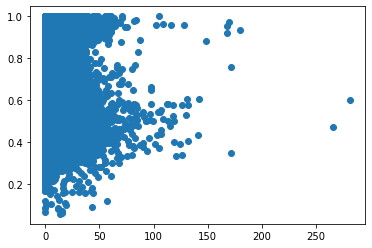

In [ ]:
x = sleeps.minsafterwakeup
y = sleeps.Efficiency

plt.scatter(x, y)

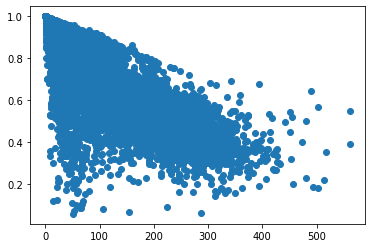

In [ ]:
x = sleeps.minsawake
y = sleeps.Efficiency

plt.scatter(x, y)

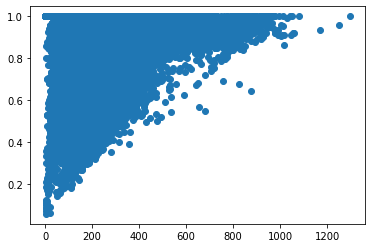

In [ ]:
x = sleeps.minsasleep
y = sleeps.Efficiency

plt.scatter(x, y)

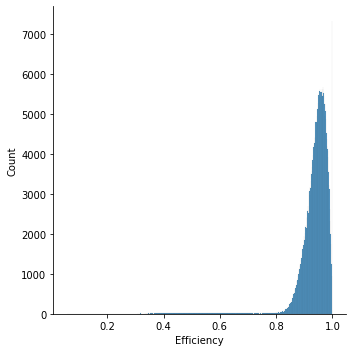

In [4]:
sns.displot(sleeps, x="Efficiency")

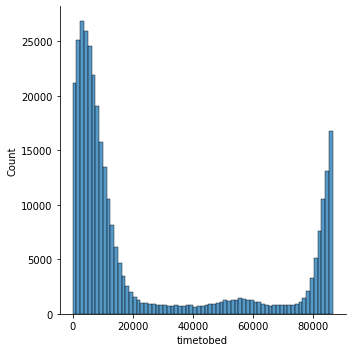

In [4]:
sns.displot(sleeps, x="timetobed")

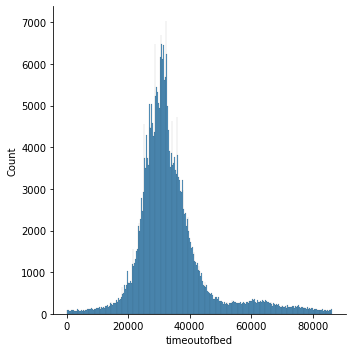

In [5]:
sns.displot(sleeps, x="timeoutofbed")

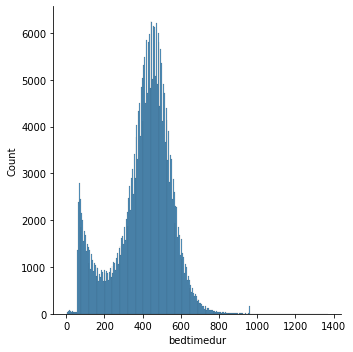

In [6]:
sns.displot(sleeps, x="bedtimedur")

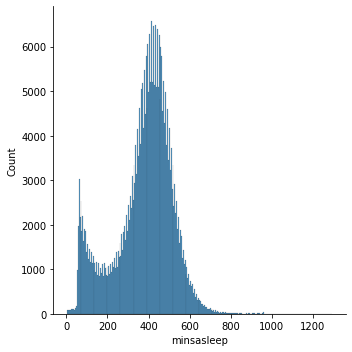

In [5]:
sns.displot(sleeps, x="minsasleep")

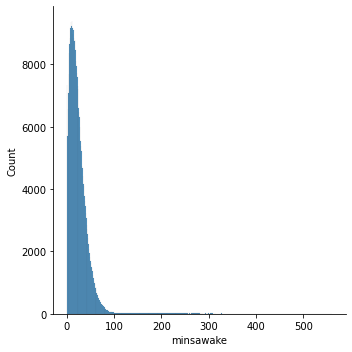

In [9]:
sns.displot(sleeps, x="minsawake", binwidth=1)

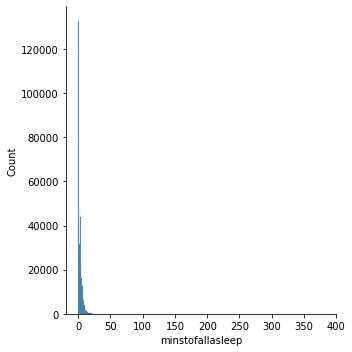

In [8]:
sns.displot(sleeps, x="minstofallasleep", binwidth=1)

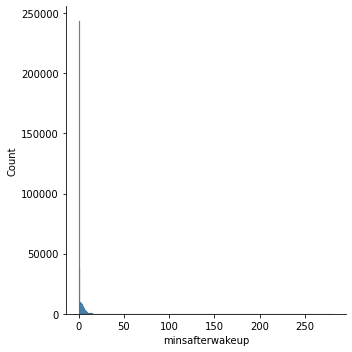

In [10]:
sns.displot(sleeps, x="minsafterwakeup", binwidth=1)

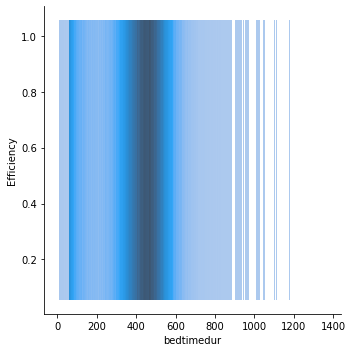

In [3]:
sns.displot(sleeps, x="bedtimedur", y='Efficiency', binwidth=1)

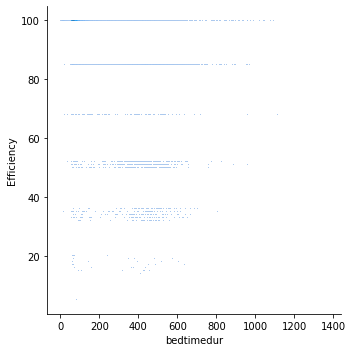

In [9]:
sns.displot(sleeps, x="bedtimedur", y='Efficiency')

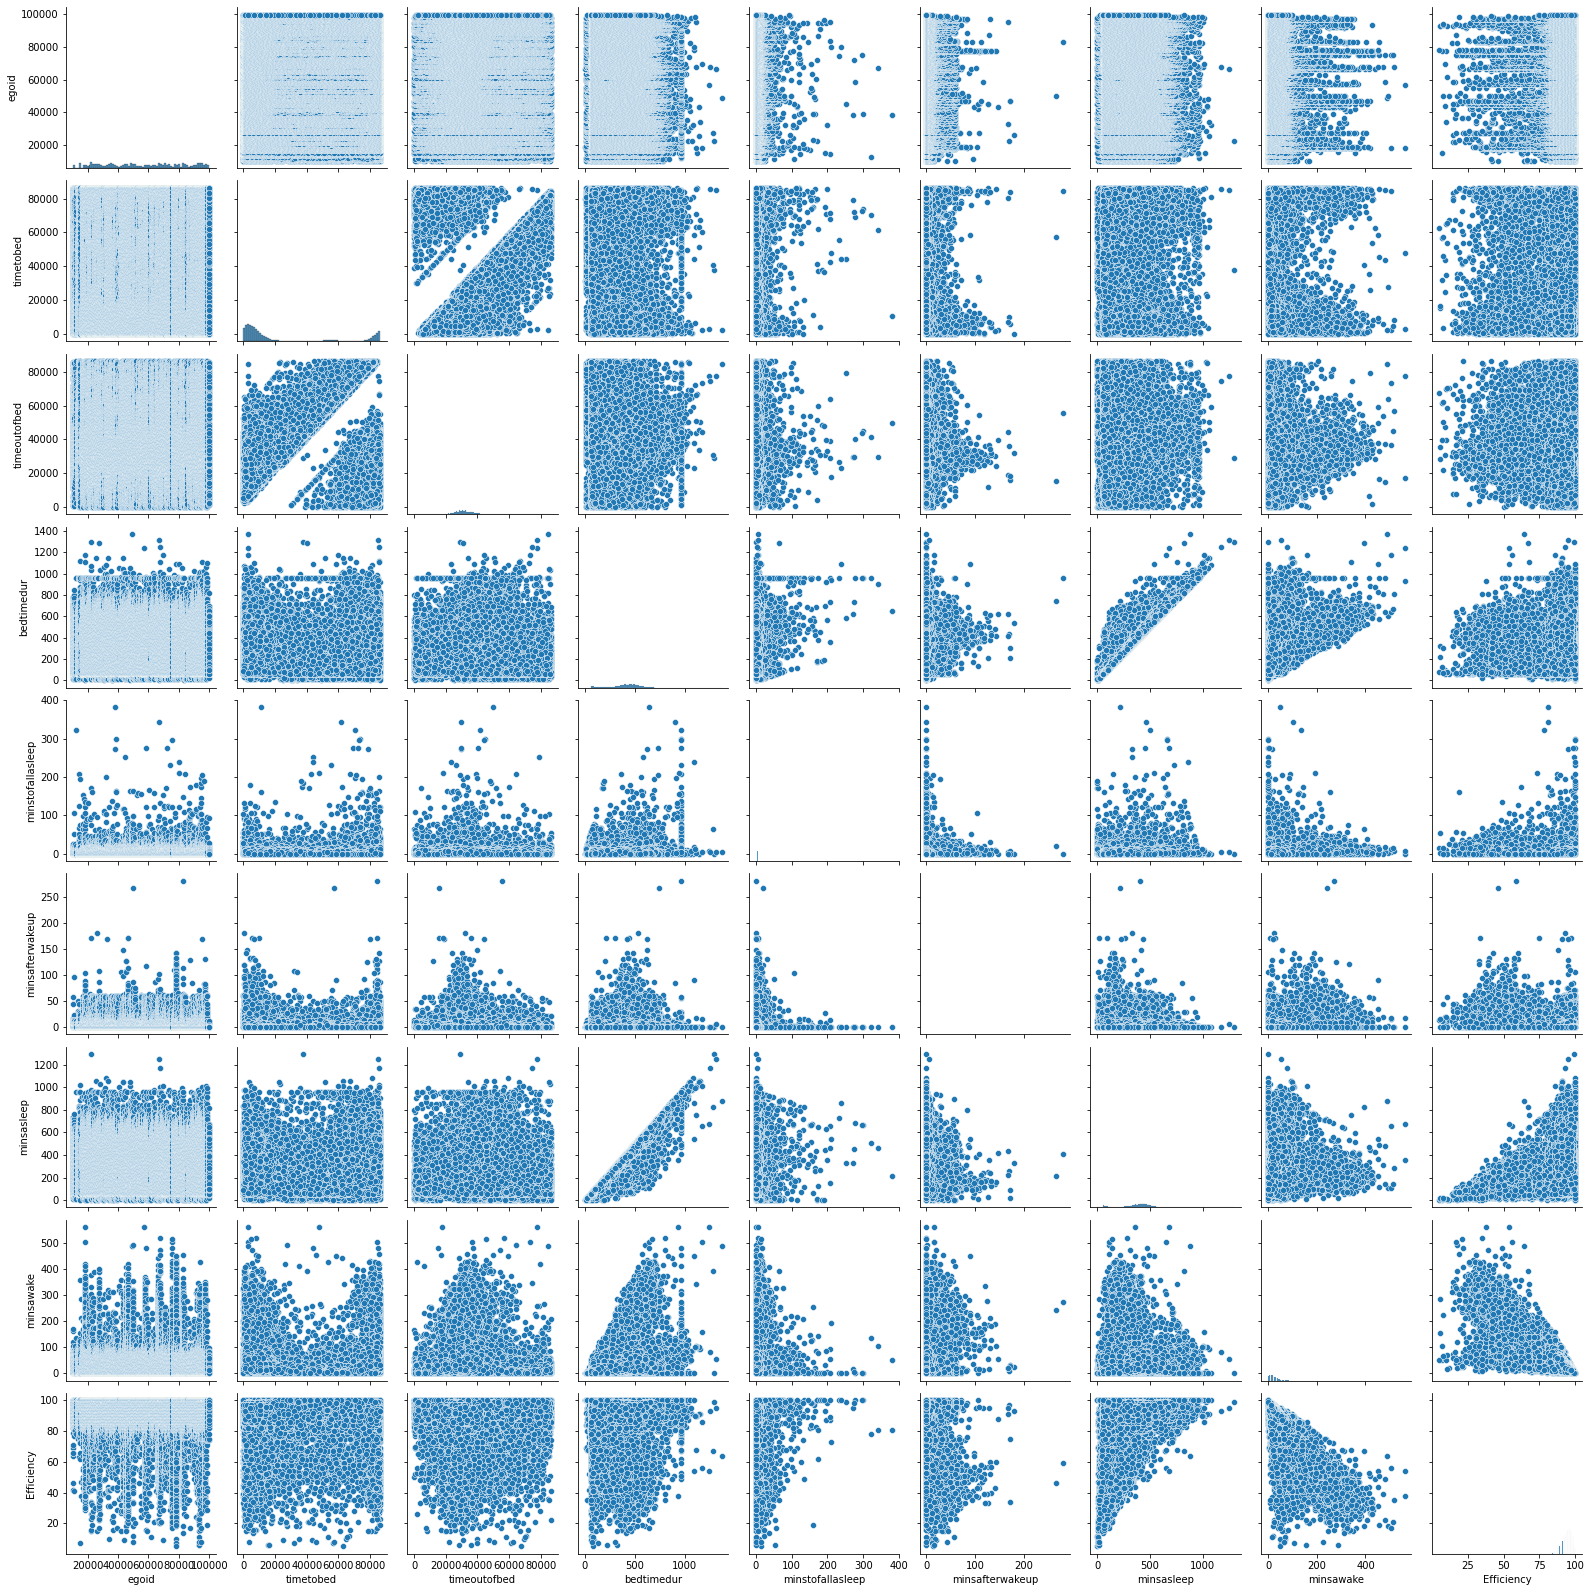

In [3]:
sns.pairplot(sleeps)